## Pymaceuticals, Inc.

### Analysis results
- Of the four drugs evaluated, Capomulin demonstrated tumor regression while the placebo and other drugs exhibited tumor growth relative to the baseline in mouse models.
- Capomulin demonstrated most reduced metastatic spread during the treatment in comparison to placebo and other drugs.
- Capomulin demonstrated the highest survival rates in comparison with the placebo and other drugs.
- Capomulin demonstrated nearly 20% tumor shrinkage while the placebo and other drugs exhibited 46-57% tumor growth following 45 days of treatment. 

In [116]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

In [117]:
#Read the datafiles to pandas dataframes
datafile1="raw_data/mouse_drug_data.csv"
datafile2="raw_data/clinicaltrial_data.csv"
df1=pd.read_csv(datafile1)
df2=pd.read_csv(datafile2)
print(df1.head())
print(df2.head())


  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [118]:
#Merge the two dataframes
df=pd.merge(df1, df2, on="Mouse ID")

# Extract data for the four drugs (Capomulin, Infubinol, Ketapril, and Placebo) only
df=df.set_index('Drug')
df=df.loc[['Capomulin','Infubinol','Ketapril','Placebo'],:]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,,
Capomulin,b128,0,45.000000,0
Capomulin,b128,5,45.651331,0
Capomulin,b128,10,43.270852,0
Capomulin,b128,15,43.784893,0
Capomulin,b128,20,42.731552,0


## Tumor Response to Treatment

In [119]:
#Generate a pivot table to summarize the data for tumor volume and metastatic sites over time
df_pivot=df.pivot_table(index=['Drug', 'Timepoint'],values=['Tumor Volume (mm3)','Metastatic Sites'],aggfunc=np.mean)
df_pivot.head()

Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000           45.000000
          5                  0.160000           44.266086
          10                 0.320000           43.084291
          15                 0.375000           42.064317
          20                 0.652174           40.716325

In [120]:
#Make a pivot table to generate the standard error data for tumor volume and metastatic sites for subsequent analyses
std_error=df.pivot_table(index=['Drug', 'Timepoint'],values=['Tumor Volume (mm3)','Metastatic Sites'],aggfunc=sem)
std_error.head()

Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000            0.000000
          5                  0.074833            0.448593
          10                 0.125433            0.702684
          15                 0.132048            0.838617
          20                 0.161621            0.909731

In [121]:
#Get unique drug names
drug_index=df_pivot.index.get_level_values(0).unique()
drug_index

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

In [131]:
#Get % tumor volume change from baseline time point
#Get the list of tumor volume change over time for each drug
tumor_vol_change_list=[]

#loop through all the drugs
for drug in drug_index:
    
    #Tumor volume at timepoint 0
    tumor_vol_t0=df_pivot.loc[drug].loc[0]['Tumor Volume (mm3)']
    
    #Number of timepoints
    num_timepoints=len(df_pivot.loc[drug]['Tumor Volume (mm3)'].index)
    
    #Loop through each timepoint
    for i in range(num_timepoints):
        
        #Each timepoint
        tp=5*i
        #Tumor volume at each timepoint
        tumor_vol_tp=df_pivot.loc[drug].loc[tp]['Tumor Volume (mm3)']
        #Tumor % volume change relative to timepoint 0
        tumor_vol_change=(tumor_vol_tp-tumor_vol_t0)/tumor_vol_t0*100
        #Generate a list of tumor volume change
        tumor_vol_change_list.append(tumor_vol_change)

#Convert the tumor change list to dataframe
tumor_vol_change_df=pd.DataFrame({"Tumor Volume Change (%)":tumor_vol_change_list}, index=df_pivot.index)
tumor_vol_change_df.head()

Tumor Volume Change (%)
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                        -1.630919
          10                       -4.257132
          15                       -6.523739
          20                       -9.519277

In [123]:
#Reshape the tumor volume change dataframe for easy graph plotting
#Tumor volume data for the first drug (d1)
tumor_vol_d1=df_pivot.loc['Capomulin']['Tumor Volume (mm3)']

#Loop through the remaining drugs
for drug in drug_index[1:]:
    #Tumor volume data for drug x (dx)
    tumor_vol_dx=df_pivot.loc[drug]['Tumor Volume (mm3)']
    #Combine the dataframes
    tumor_vol_dall=pd.concat([tumor_vol_d1,tumor_vol_dx], axis=1) 
    #Assign the combined dataframe to  tumor_vol_d1
    tumor_vol_d1=tumor_vol_dall

#Assign the column names
tumor_vol_dall.columns=drug_index

tumor_vol_dall.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


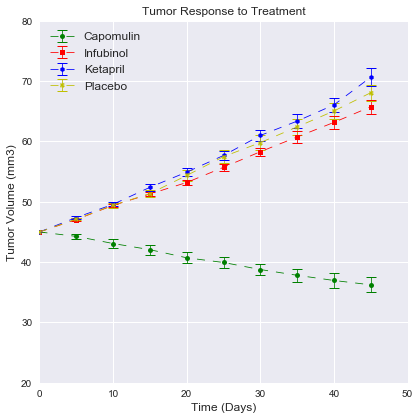

In [138]:
#Plot a line plot of tumor volume against the treatment time (days)
#Set x axis values
x_axis=tumor_vol_dall.index

#set line color and marker panels
color_panel=['g','r','b','y','r','g','b','y','r','g']
filled_markers = ['o', 's', 'h', 'X', '>', '^', 'v', 'p', '*', '8', 'H', 'D', 'd', 'P', '<']

# Set figure size to adjust for space
plt.figure(figsize=(6,6))

#Plot the graph with error bars
#Loop through the drugs
for i,drug in enumerate (drug_index):
    
    #Extract the tumor volume data as y_axis
    y_axis=tumor_vol_dall[drug]
    
    #plot the graph with error bars
    (_,caps,_)=plt.errorbar(x_axis, y_axis, yerr=std_error.loc[drug]['Tumor Volume (mm3)'], 
                 c=color_panel[i], marker=filled_markers[i], markersize=5, capsize=5, dashes=[10,10], linewidth=0.8)
    for cap in caps:
        cap.set_markeredgewidth(1)

# Set x and y limits
plt.xlim(0, max(x_axis)+5)
plt.ylim(20, 80)

# Set a Title and labels
plt.title("Tumor Response to Treatment", fontsize=12)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.legend(drug_index, loc='best', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()



## Metastatic Response to Treatment

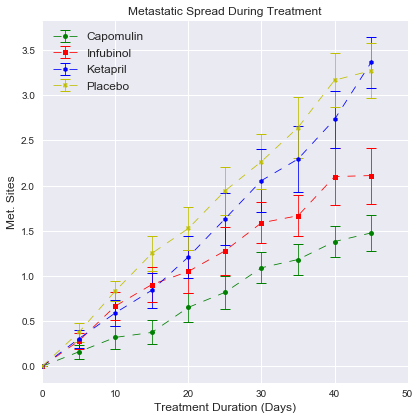

In [137]:
#Plot a line plot of metastastic sites against the treatment time (days)
#Set the x axis values
x_axis=tumor_vol_dall.index

#Set line color and marker panels
color_panel=['g','r','b','y','r','g','b','y','r','g']
filled_markers = ['o', 's', 'h', 'X', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

# Set figure size to adjust for space
plt.figure(figsize=(6,6))

#Plot a graph with error bars
for i,drug in enumerate (drug_index):
    (_,caps,_)=plt.errorbar(x_axis, df_pivot.loc[drug,'Metastatic Sites'], yerr=std_error.loc[drug]['Metastatic Sites'], 
                 color=color_panel[i], fmt=filled_markers[i], capsize=5, markersize=5, dashes=[10,10], linewidth=0.8)
    for cap in caps:
        cap.set_markeredgewidth(1)
        
# Set x and y limits
plt.xlim(0, max(x_axis)+5)
#plt.ylim(20, 80)

# Set a Title and labels
plt.title("Metastatic Spread During Treatment",fontsize=12)
plt.xlabel("Treatment Duration (Days)",fontsize=12)
plt.ylabel("Met. Sites",fontsize=12)
plt.legend(drug_index, loc='best', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

## Survival Rates

In [126]:
#Count the mouse survivals 
survival_count=df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)'].count()
survival_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Tumor Volume (mm3), dtype: int64

In [139]:
#The mouse survival count for drug Capomulin
survival_d1=survival_count['Capomulin']

#Generate a summary frame for the survival count by concatenating the individual drug's data
#Loop through the remaining drugs
for drug in drug_index[1:]:
    survival_dx=survival_count[drug]
    survival_summary=pd.concat([survival_d1,survival_dx], axis=1) 
    survival_d1=survival_summary

#Assign the drug names to the column headers
survival_summary.columns=drug_index

survival_summary.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


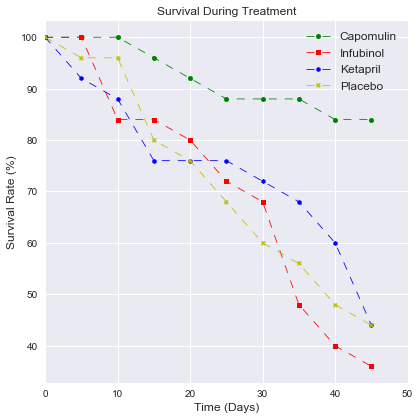

In [140]:
#Plot the survival rate graph
#Set the figure size
plt.figure(figsize=(6,6))

#Set x axis values
x_axis=survival_summary.index

#Set line color and marker panels
color_panel=['g','r','b','y','r','g','b','y','r','g']
filled_markers = ['o', 's', 'h', 'X', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

#Loop through the drugs
for i,drug in enumerate (drug_index):
    
    #Set the mouse counts at the beginning (t0)
    num_t0=survival_summary[drug][0]
    
    #Plot the survival counts against the time points
    plt.plot(x_axis,survival_summary[drug]/num_t0*100, marker=filled_markers[i], markersize=5, c=color_panel[i],
             dashes=[10,10], linewidth=0.8)

# Set x and y limits
plt.xlim(0, max(x_axis)+5)
#plt.ylim(20, 80)

# Set a Title and labels
plt.title("Survival During Treatment",fontsize=12)
plt.xlabel("Time (Days)",fontsize=12)
plt.ylabel("Survival Rate (%)",fontsize=12)
plt.legend(drug_index, loc='best',fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

## Summary Bar Graph

In [129]:
#Calculate the % tumor volume change of 45-day treatment from the baseline (day 0)
summary=(tumor_vol_dall.loc[45]/tumor_vol_dall.loc[0]-1)*100
summary.head()

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

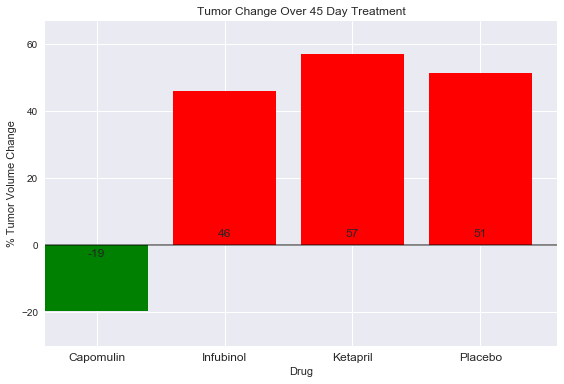

In [147]:
#Plot the bar graph for the % tumor volume change
#Set X and y axes
x_axis = np.arange(len(summary.index))
y_axis=summary.values

#Set tick locations
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,3))

#Set space for the figure 
fig, ax = plt.subplots()

#Plot the horizontal line as the x axis
ax.hlines(0,0,len(x_axis), alpha=0.5)

#Plot the bar graph
#Loop through the y axis values
for i,y in enumerate (y_axis):
    
    #Set up conditionals to set different colors for the bars with positive/negative values
    if y<0:
        rects=ax.bar(x_axis[i], y, color='g', alpha=1, align="edge")
    else:
        rects=ax.bar(x_axis[i], y, color='r', alpha=1, align="edge")
    
    #Set up a loop to label the individual bars with their values
    for r in rects: 
        height = r.get_height()
        if height >0:
            ax.text(r.get_x() + r.get_width()/2., 2,'%d' % int(height),ha='center', va='bottom')
        else:
            ax.text(r.get_x() + r.get_width()/2., -4,'%d' % int(height),ha='center', va='bottom')

#Set xticks
plt.xticks(tick_locations, summary.index, rotation="horizontal", fontsize=12)

# Set x and y limits
plt.xlim(0, len(x_axis))
plt.ylim(-30, max(y_axis)+10)

# Set a Title and labels
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid(True)

plt.tight_layout()
plt.show()